# Mobile Price Prediction

IMPORT LIBRARY...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('datasets_train.csv')

In [3]:
dataset.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# STEP 3 : DATA PREPROCESSING

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Note:
1. No missing values
2. Categorical data already handled
3. No textual values

SEPERATING DATASET INTO FEATURE MATRIX AND VECTOR OF PREDICTION:

As mentioned above, our data have labels and we will apply supervised learning algorithms.
We define our target column as "y" and rest of the data which are used as inputs as "X".

In [5]:
X=dataset.iloc[:,0:20]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [6]:
y=dataset.iloc[:,20]
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study.

array([1, 2, 3, 0], dtype=int64)

FEATURE SCALING : 
We need to normallize and scale the data, so we'll use MinMaxScaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [8]:
X=min_max.fit_transform(X) 

In [9]:
X=pd.DataFrame(X)

In [10]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In addition to 'data.csv' file, we have a 'test_data.csv' file, but latter one does not have target data so we do not have the chance of testing our model with it.
We split our dataset into 'training' and 'testing' datasets. And, we are going to see our models' accuracy by applying them on  test dataset.

Splitting dataset into train and test dataset in the ratio 4:1

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
# check whether the split works correctly 
print(X_train.shape)
print(X_test.shape)

(1600, 20)
(400, 20)


Now, our data is ready to be used as a sample for predicting models.

# STEP 4 : IMPLEMENTING ML ALGORITHMS

To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and testing dataset.
After that, we are going to choose the best model for our data set and create target values for test dataset.

# Logistic Regression
Target variables of the data set are discrete, hence, we are going to apply multiclass logistic regression model.

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred_lr = lr.predict(X_test)

In [18]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
confusion_matrix

array([[90,  4,  0,  0],
       [ 4, 94,  4,  0],
       [ 0, 13, 97, 10],
       [ 0,  0,  1, 83]], dtype=int64)

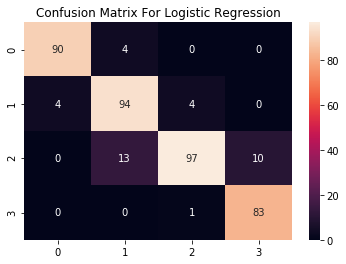

In [20]:
# Representing graphically

plt.title('Confusion Matrix For Logistic Regression')
sns.heatmap(confusion_matrix,annot=True)

In [22]:
print("Train result:", lr.score(X_train, y_train))
# accuracy of this model:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_lr))

Train result: 0.9525
Accuracy: 0.91


In [24]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.85      0.92      0.88       102
           2       0.95      0.81      0.87       120
           3       0.89      0.99      0.94        84

    accuracy                           0.91       400
   macro avg       0.91      0.92      0.91       400
weighted avg       0.91      0.91      0.91       400



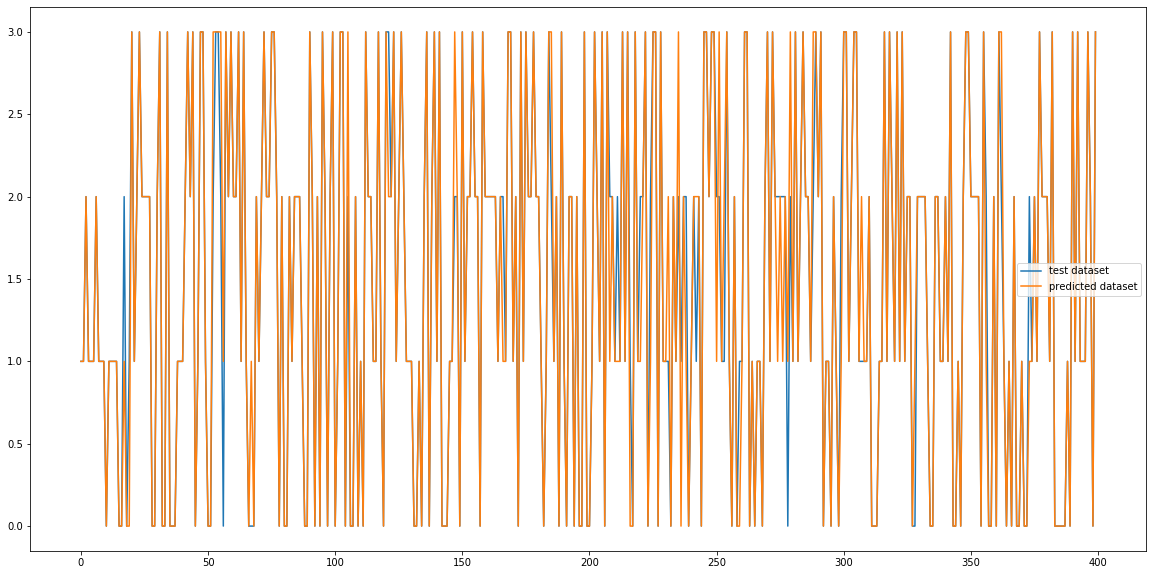

In [27]:
#diff_logistic_regression= y_test- y_pred_lr

plt.figure(figsize=(20,10))
# plt.scatter(np.arange(len(diff)),diff, label='residuals')
plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), y_pred_lr, label='predicted dataset')
plt.legend()

# K-Nearest Neighbour

In [32]:
from sklearn.neighbors import KNeighborsClassifier
#-------------finding the appropriate value of k---------------

score=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))
print(max(score))
print(score.index(max(score)))

0.4325
8


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) #at k=8,the value is high i.e 0.4325
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [34]:
y_pred_knn = knn.predict(X_test)

In [35]:
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy : ",acc_knn)

Accuracy :  0.41


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix_knn=confusion_matrix(y_test,y_pred_knn)
confusion_matrix_knn

array([[55, 26,  9,  4],
       [44, 35, 19,  4],
       [18, 42, 34, 26],
       [ 3, 17, 24, 40]], dtype=int64)

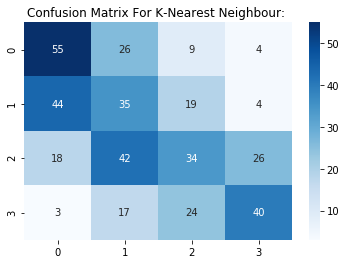

In [42]:
# Representing graphically

plt.title('Confusion Matrix For K-Nearest Neighbour: ')
sns.heatmap(confusion_matrix_knn, annot= True, cmap='Blues')

In [43]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [44]:
print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_knn, average='micro')))

Micro Precision: 0.41
Micro Recall: 0.41
Micro F1-score: 0.41



In [45]:
print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_knn, average='macro')))

Macro Precision: 0.42
Macro Recall: 0.42
Macro F1-score: 0.42



In [46]:
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred_knn, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred_knn, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred_knn, average='weighted')))

Weighted Precision: 0.41
Weighted Recall: 0.41
Weighted F1-score: 0.41


In [48]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_knn, target_names=['Class 1', 'Class 2', 'Class 3','Class 4']))


Classification Report

              precision    recall  f1-score   support

     Class 1       0.46      0.59      0.51        94
     Class 2       0.29      0.34      0.32       102
     Class 3       0.40      0.28      0.33       120
     Class 4       0.54      0.48      0.51        84

    accuracy                           0.41       400
   macro avg       0.42      0.42      0.42       400
weighted avg       0.41      0.41      0.41       400



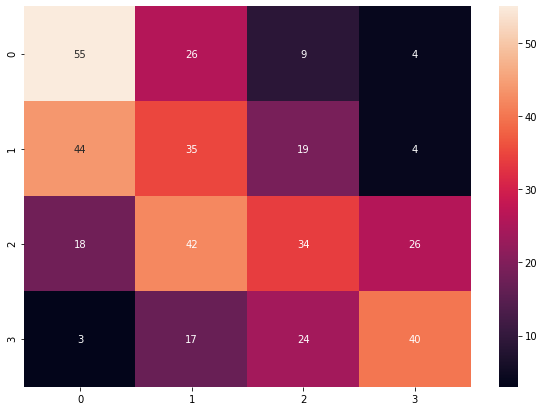

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix_knn,annot=True)

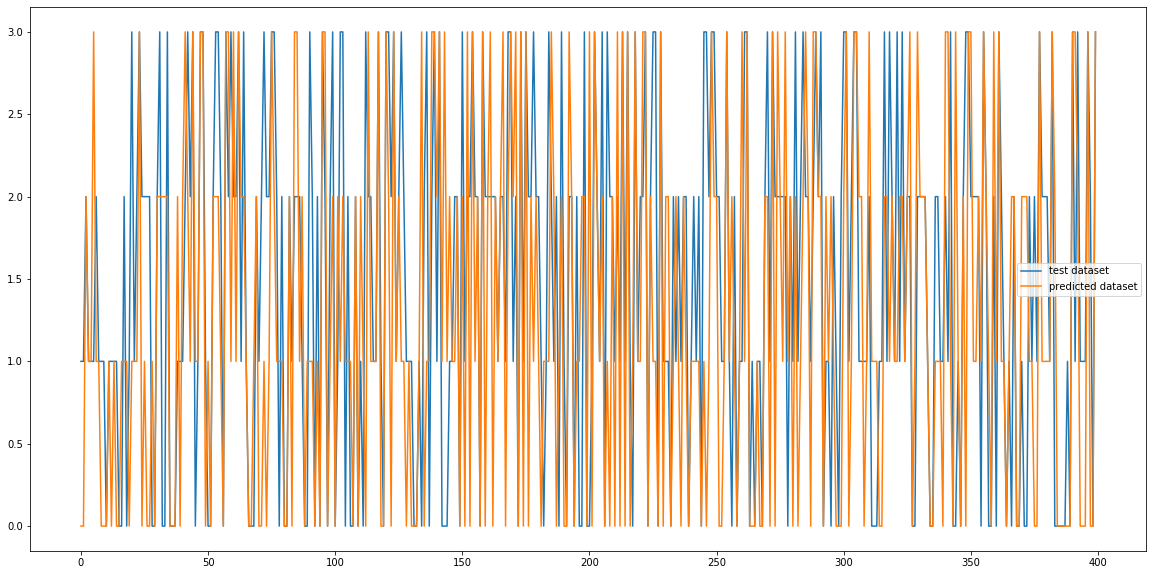

In [51]:
#diff_knn_model= y_test- knn_prediction

plt.figure(figsize=(20,10))
plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), y_pred_knn, label='predicted dataset')
plt.legend()

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [64]:
# Let's start with Decision Trees using gini impurity(CART):

decision_tree= DecisionTreeClassifier()

dt_model=decision_tree.fit(X_train, y_train)

predicted_decision_tree= decision_tree.predict(X_test)

dt_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
print("Test result of Decision Trees Model: ", decision_tree.score(X_test, y_test))

print("Train result of Decision Trees Model: ", decision_tree.score(X_train, y_train))

Test result of Decision Trees Model:  0.8225
Train result of Decision Trees Model:  1.0


In [67]:
# Now predicting the accuracy and auc-roc of this model:

accuracy_decision_tree=metrics.accuracy_score(y_test, predicted_decision_tree)
print("Accuracy of Decision Tree Model: ", accuracy_decision_tree)

Accuracy of Decision Tree Model:  0.8225


In [68]:
# representing graphically:

text_representation= tree.export_text(decision_tree)

print(text_representation)

|--- feature_13 <= 0.53
|   |--- feature_13 <= 0.23
|   |   |--- feature_11 <= 0.74
|   |   |   |--- feature_0 <= 0.89
|   |   |   |   |--- feature_13 <= 0.22
|   |   |   |   |   |--- feature_11 <= 0.55
|   |   |   |   |   |   |--- feature_13 <= 0.15
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  0.15
|   |   |   |   |   |   |   |--- feature_13 <= 0.16
|   |   |   |   |   |   |   |   |--- feature_12 <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_12 >  0.55
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_13 >  0.16
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  0.55
|   |   |   |   |   |   |--- feature_0 <= 0.73
|   |   |   |   |   |   |   |--- feature_16 <= 0.97
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_16 >  0.97
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.69


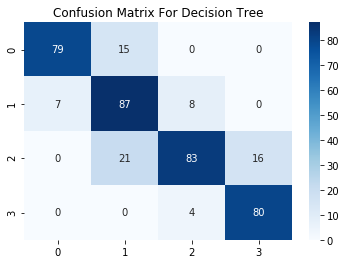

In [69]:
# Now drawing confusion matrix for above model

confusion_matrix_decision_tree= confusion_matrix(y_test, predicted_decision_tree)

# Representing graphically

plt.title('Confusion Matrix For Decision Tree')
sns.heatmap(confusion_matrix_decision_tree, annot= True, cmap='Blues')

In [70]:
print(metrics.classification_report(y_test, predicted_decision_tree))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        94
           1       0.71      0.85      0.77       102
           2       0.87      0.69      0.77       120
           3       0.83      0.95      0.89        84

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.82      0.82       400



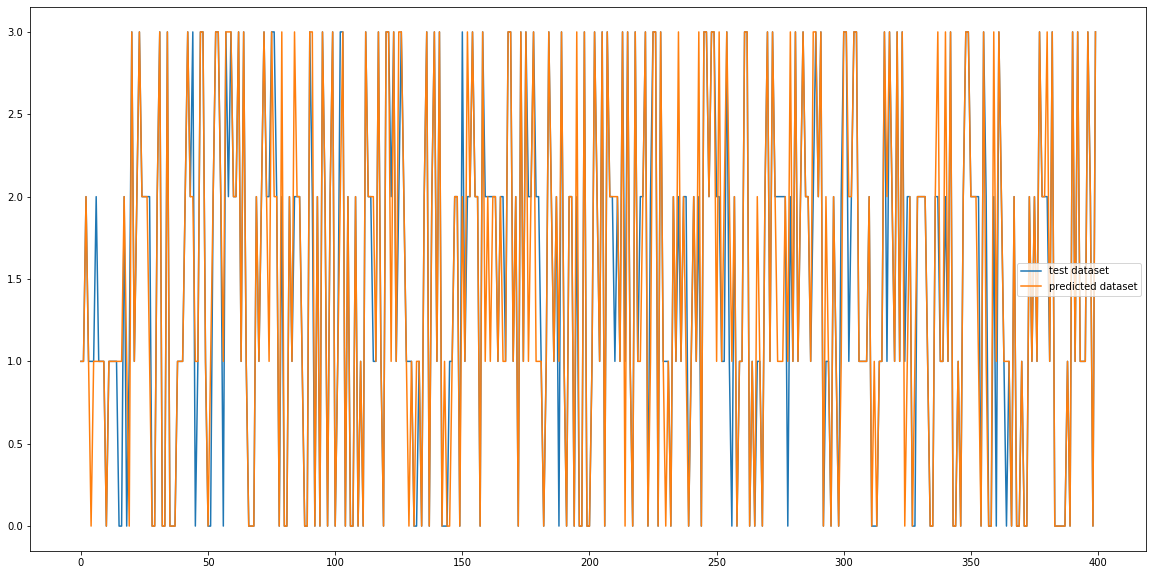

In [72]:
#diff_dt= y_test- predicted_decision_tree

plt.figure(figsize=(20,10))

plt.plot(np.arange(len(X_test)), y_test, label='test dataset')
plt.plot(np.arange(len(X_test)), predicted_decision_tree, label='predicted dataset')
plt.legend()